# **Discriminante de Fisher**
Luis Felipe Castro Corrales &ensp; 181417  
David Emmanuel González Cázares &ensp; 198582  
René Ochoa Sawaya &ensp; 179080  
<hr>

> Describir el modelo y la intuición. Explicar cómo se estiman los parámetros vía máxima verosimilitud. Ilustrar mediante un ejemplo.

<hr>

# Introducción

El discriminante de Fisher se utiliza para separar en clases una población (como especies de plantas, marcas de coches o tipos de tumores). Se le asigna una etiqueta con su clase a cada observación. 

Para discriminar se utilizan las observaciones etiquetadas para construir un clasificador que separe las observaciones en sus clases de la mejor manera posible.

Despues se utiliza el clasificador para predecir la clase de observaciones no etiquetadas.

# Clases y atributos

La población está partida en clases sin orden. Cada elemento de la población pertenece a una y solo una clase. Todos los elementos tienen medidas variables por los cuales se le clasifica, a estas se les llaman atributos. 

Ejemplos de atributos pueden ser: de una persona en una población la altura, el peso, la edad; de un foco la luminosidad, su tiempo de vida, su consumo de watts por hora; de una flor su color, su consumo de agua diario su número de pétalos, etc.

# Análisis por Discriminante Lineal Gaussiano

El Análisis por Discriminación Lineal tiene su origen en una publicación de R. A. Fisher en los *Anales de la Eugenesia* (Fisher,&nbsp;1936). En escencia, el discriminante propuesto por Fisher busca encontrar un vector $\mathbf{b}$ tal que al realizar la operación $\mathbf{b}^\mathrm{T} \mathbf{x}$ se maximice la separación entre clases. Actualmente, el Análisis por Discriminante Lineal toma supuestos adicionales sobre la distribución de los datos para derivar resultados sobre la probabilidad de error de clasificación y para encontrar los estimadores de máxima verosimilitud de los parámetros desconocidos.

Para hacer Análisis por Discriminante Lineal Gausiano, supongamos primero que tenemos dos clases $\Pi_1$ y $\Pi_2$ que dan origen a un conjunto de datos. Suponemos que una observación cualquiera $\mathbf{X}=\mathbf{x}$ proviene de la clase $\Pi_i$ con una *probabilidad previa* $\pi_i$. Además supongamos que la densidad de probabilidad condicional de $\mathbf{x}$ para la clase $i$ es 
$$
\mathrm{P}(\mathbf{X}=\mathbf{x}|\mathbf{X}\in\Pi_i) = f_i(\mathbf{x}), \quad i =1,2.
$$
Recordemos que la regla de clasificación de Bayes asigna $\mathbf{x}$ a la clase $\Pi_i$ con la mayor *probabilidad posterior* $p(\Pi_i|\mathbf{x}) = \mathrm{P}(\mathbf{X}\in\Pi_i|\mathbf{X}=\mathbf{x})$. Así, por la Regla de Bayes, determinamos que se asigna $\mathbf{X}$ a $\Pi_1$ si
\begin{equation}
\tag{1} \frac{f_1(\mathbf{x})\pi_1}{f_2(\mathbf{x})\pi_2} > 1
\end{equation}

El Análisis por Discriminante Lineal Gausiano parte del la regla de clasificación de Bayes (1) pero añade el supuesto de que ambas densidades de probabilidad son distribuciones normales multivariadas con medias arbitrarias pero con una matriz de covarianza en común. De tal forma al sustituir las funciones $f_i(\cdot)$ y aplicando logaritmo natural, obtenemos
\begin{equation}
\tag{2} L(\mathbf{x}) = \ln\left\{\frac{f_1(\mathbf{x})\pi_1}{f_2(\mathbf{x})\pi_2}\right\} = b_0 + \mathbf{b}^\mathrm{T} \mathbf{x}
\end{equation}
que es una función lineal de $\mathbf{x}$ donde
\begin{equation}
\tag{3} \mathbf{b} = \Sigma_\mathbf{XX}^{-1}(\mu_1-\mu_2)
\end{equation}

\begin{equation}
\tag{4} b_0 = -\frac{1}{2}\left\{\mu_1^\mathrm{T}\Sigma_\mathbf{XX}^{-1}\mu_1 - \mu_2^\mathrm{T}\Sigma_\mathbf{XX}^{-1}\mu_2\right\} + \ln\left\{\frac{\pi_1}{\pi_2}\right\}
\end{equation}

Así, se asigna $\mathbf{X}$ a $\Pi_1$ si $L(\mathbf{x})>0$, o de lo contrario, se asigna $\mathbf{X}$ a $\Pi_2$.



## Probabilidad de error de clasificación

Las observaciones se clasifican según en cual de las dos regiones de clasificación caegan. La probabilidad de clasificar erroneamente la observación es la probabilidad de que caega en la región de la clase con la que no está etiquetada. La probabilidad de error de clasificación incrementa conforme la observación se vuelve más equidistante entre las regiones de claificación.

## Estimadores muestrales

La estimación de medias de cada clase se estiman mediante las medias muestrales de los datos observados en cada clase $hat{\boldsymbol{\mu}}j = \frac{1}{n_j} \sum{i=1}^{n_j} \mathbf{x}{ij}$. Y la estimación de la covarianza común se utiliza la matriz de covarianza muestral $\hat{\boldsymbol{\Sigma}} = \frac{1}{N - K} \sum{j=1}^{K} \sum_{i=1}^{n_j} (\mathbf{x}{ij} - \hat{\boldsymbol{\mu}}_j)(\mathbf{x}{ij} - \hat{\boldsymbol{\mu}}_j)^T$. Estos dos son los estimadores de máxima verosimilitud.

# Implementación y ejemplo de clasificación
En esta sección crearemos una función que genere un clasificador lineal y lo probaremos con la base de datos _inserte nombre de base de datos_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LDAGaussiano:
    def __init__(self):
        b0 = None
        b = None
        clases = None


    def entrenar(self, datos, clasific):
        a,b = datos.shape
        self.clases, inv, counts = np.unique(clasific, return_inverse = True, return_counts = True)
        mu_1, mu_2 = np.zeros(b), np.zeros(b)
        sxx_1, sxx_2 = np.zeros((b,b)), np.zeros((b,b))

        for i in range(0,a):
            if clasific[inv[i]] == self.clases[0]:
                mu_1 += datos[i,::]
            else:
                mu_2 += datos[i,::]
        mu_1 /= counts[0]
        mu_2 /= counts[1]

        for i in range(0,a):
            if clasific[inv[i]] == self.clases[0]:
                sxx_1 += np.outer(datos[i,::]-mu_1,datos[i,::]-mu_1)
            else:
                sxx_2 += np.outer(datos[i,::]-mu_2,datos[i,::]-mu_2)
        sigma_xx = (sxx_1 + sxx_2)/a

        self.b0 = -(np.inner(mu_1,np.linalg.solve(sigma_xx,mu_1)) - np.inner(mu_2,np.linalg.solve(sigma_xx,mu_2)))/2 + np.log(counts[0]/counts[1])
        self.b = np.linalg.solve(sigma_xx,(mu_1-mu_2))

        return self.b0, self.b.shape


    def predecir(self,datos):
        if (self.b0 is not None) and (self.b is not None):
            sol = None
            if datos.ndim == 1:
                L = self.b0 + np.inner(self.b,datos)
                if L > 0:
                    sol = self.clases[1]
                else:
                    sol = self.clases[0]
            else:
                a,_ = datos.shape
                sol = np.zeros(a)
                for index, x in enumerate(datos):
                    L = self.b0 + np.inner(self.b,x)
                    if L > 0:
                        sol[index] = self.clases[1]
                    else:
                        sol[index] = self.clases[0]
            return sol
        else:
            print("Debes entrenar el modelo.")

    def accuracy(self):
        pass


In [2]:
import pandas as pd

df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
df = df.reset_index()  # make sure indexes pair with number of rows

for index, row in df.iterrows():
    print(index, row[1], row[2])

datos = np.array([[2, 3, 3], [4, 5, 6],[1,9,3.5],[1,2,2],[4.5,5.5,6.6]])
clasific = np.array([1,2,1,1,2])
lda = LDAGaussiano()
lda.entrenar(datos,clasific)

0 10 100
1 11 110
2 12 120


C:\Users\Felip\AppData\Local\Temp\ipykernel_24288\3280623294.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(index, row[1], row[2])


(1466.0602270127372, (3,))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mnist_test = pd.read_csv('data/mnist_test_1.csv', header=None)
mnist_train = pd.read_csv('data/mnist_train_1.csv', header=None)

mnist_test = mnist_test[mnist_test[0].isin([1,5])].to_numpy()
mnist_train = mnist_train[mnist_train[0].isin([1,5])].to_numpy()

#np.savetxt("data/mnist_test_1.csv", mnist_test, fmt="%d", delimiter=",")
#np.savetxt("data/mnist_train_1.csv", mnist_train, fmt="%d", delimiter=",")

print(mnist_train.shape, mnist_test.shape)

(12163, 785) (2027, 785)


In [4]:
mnist_test_y = mnist_test[::,0]
mnist_test_x = mnist_test[::, 1:]
mnist_train_y = mnist_train[::,0]
mnist_train_x = mnist_train[::, 1:]

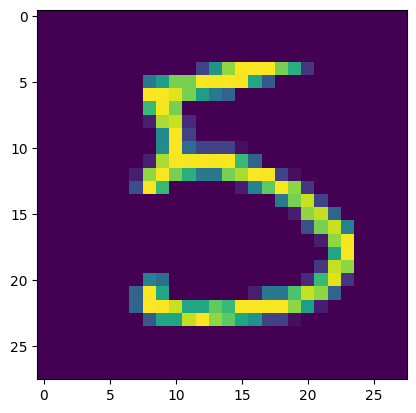

In [5]:
imgplot = plt.imshow(mnist_test_x[4].reshape(28,28))

In [6]:
#np.var(array_2d, axis = 0)
idx = np.argwhere(np.all(mnist_train_x[..., :] == 0, axis=0))
idx.shape

(151, 1)

In [7]:
mnist_train_x = np.delete(mnist_train_x, idx, axis=1)
mnist_train_x.shape

(12163, 633)

In [8]:
mnist_test_x = np.delete(mnist_test_x, idx, axis=1)
mnist_test_x.shape

(2027, 633)

In [9]:
lda = LDAGaussiano()
lda.entrenar(mnist_train_x,mnist_train_y)

(9.758582406962178, (633,))

In [10]:
lda_predict = lda.predecir(mnist_test_x)
lda_predict

array([1., 1., 5., ..., 5., 1., 5.])

In [11]:
def accuracy(a,b):
    n = len(a)
    sum = 0
    for i in range(0,n):
        if a[i] == b[i]:
            sum += 1
    return sum/n

In [12]:
lda_accuracy = accuracy(mnist_test_y, lda_predict)
lda_accuracy

0.9896398618648249

  # Referencias
  
  Izenman, A. J. (2008). *Modern multivariate statistical techniques* (Vol. 1). New York: Springer.

  Fisher, R. A. (1936). *The use of multiple measurements in taxonomic problems*. Annals of eugenics, 7(2), 179-188.